In [7]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [8]:
df = 'E:\Alura_Challenge_Data_Science\data\df_limpo.csv'

In [9]:
df = pd.read_csv(df)
df = df.drop(columns=['Unnamed: 0'])
df

,ID,target,GENERO,IDOSO,CÔNJUGE,DEPENDENTES,MESES_CONTRATO,ASS_TEL,ASS_MULTI_TEL,ASS_INTERNET,ASS_AD_SEGURANÇA,BACKUP,PROTEÇÃO_DISPOSITIVO,SUP_TÉCNICO,TV_CABO,STREAMING,CONTRATO,FATURA_ONLINE,GASTO_DIARIO,FORMA_PAGAMENTO,GASTO_MENSAL,GASTO_TOTAL
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.197407,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,2.008889,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.340417,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.173974,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.971111,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,1.904872,Mailed check,55.15,742.90
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,2.838939,Electronic check,85.10,1873.70
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,1.545833,Mailed check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,2.302313,Mailed check,67.85,4627.65


### 1. Pycaret

In [3]:
import pycaret

In [4]:
from pycaret.classification import *

In [1]:
from pycaret.utils import version
version()

'2.3.10'

In [10]:
cla = setup(data = df, 
            target='target',
            train_size=0.5, 
            silent=True,
            #feature_interaction=True,
            fix_imbalance=True
            )

,Description,Value
0,session_id,4056
1,Target,target
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7032, 22)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
compare_models( fold = 3,
                sort='AUC'
                )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7952,0.8460,0.6327,0.6102,0.6209,0.4807,0.4811,1.4200
gbc,Gradient Boosting Classifier,0.7947,0.8413,0.6026,0.6144,0.6083,0.4692,0.4693,3.4233
catboost,CatBoost Classifier,0.7969,0.8413,0.5682,0.6298,0.5971,0.4619,0.4632,4.6300
lda,Linear Discriminant Analysis,0.7426,0.8326,0.7938,0.5103,0.6208,0.4400,0.4648,11.3367
rf,Random Forest Classifier,0.7932,0.8302,0.5048,0.6411,0.5642,0.4312,0.4369,0.9567
et,Extra Trees Classifier,0.7904,0.8263,0.5242,0.6272,0.5702,0.4331,0.4368,1.3633
xgboost,Extreme Gradient Boosting,0.7716,0.8076,0.5048,0.5787,0.5392,0.3883,0.3899,5.1067
nb,Naive Bayes,0.3831,0.8023,0.9893,0.3004,0.4604,0.0907,0.2029,1.1200
knn,K Neighbors Classifier,0.6658,0.7040,0.6337,0.4141,0.5008,0.2658,0.2796,1.5200
dt,Decision Tree Classifier,0.7637,0.6839,0.5145,0.5597,0.5358,0.3777,0.3785,1.0767


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2987)

In [ ]:
plot_model(xgboost, plot = 'feature_all')

### 2. test visualization

In [4]:
import seaborn as sns
import plotly.express as px

import plotly.figure_factory as ff
import plotly.graph_objects as go

import matplotlib.pyplot as plt

from tabulate import tabulate
from IPython.display import Image
from pandas_profiling import ProfileReport
from pycorrcat.pycorrcat import plot_corr, corr_matrix


In [5]:
# Standard font for plots
def std_font(ax1, title, xlabel, ylabel):
    ax1.set_title(title, loc='left', fontdict={'fontsize': 18}, pad=20)
    ax1.set_xlabel(xlabel, fontdict={'fontsize': 12, 'style': 'italic'})
    ax1.set_ylabel(ylabel, fontdict={'fontsize': 12, 'style': 'italic'})
    return None

Como mostrado no histograma abaixo, observamos que há um desbalanceamento na variável resposta. Em algoritmos de classificação, este é um ponto importante a ser observado, pois pode influenciar negativamente o desempenho do nosso modelo.

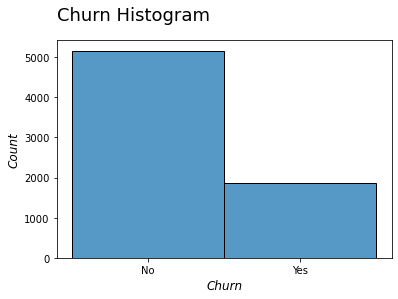

In [33]:
ax1 = sns.histplot(data=df, x='target')
std_font(ax1, 'Churn Histogram', 'Churn', 'Count')

#### 2.1 Numerical Variable

In [8]:
print(df.columns.tolist())
type(df.columns.tolist())

['ID', 'target', 'GENERO', 'IDOSO', 'CÔNJUGE', 'DEPENDENTES', 'MESES_CONTRATO', 'ASS_TEL', 'ASS_MULTI_TEL', 'ASS_INTERNET', 'ASS_AD_SEGURANÇA', 'BACKUP', 'PROTEÇÃO_DISPOSITIVO', 'SUP_TÉCNICO', 'TV_CABO', 'STREAMING', 'CONTRATO', 'FATURA_ONLINE', 'GASTO_DIARIO', 'FORMA_PAGAMENTO', 'GASTO_MENSAL', 'GASTO_TOTAL']


list

In [9]:
num_att = df.select_dtypes(['int64', 'float64'])

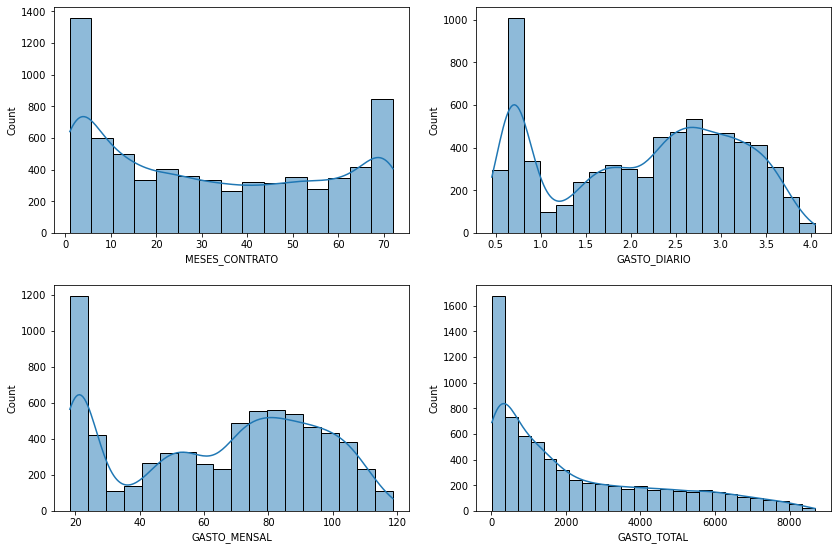

In [16]:
plt.figure(figsize=(12, 8), tight_layout={'pad': 2.0})

plt.subplot(2, 2, 1)
ax1 = sns.histplot(data=num_att, x="MESES_CONTRATO", kde=True)
std_font = (ax1, 'Tenure Histogram',
         'MESES_CONTRATO', 'Count')
plt.subplot(2, 2, 2)
ax2 = sns.histplot(data=num_att, x="GASTO_DIARIO", kde=True)
std_font = (ax2, 'Daily Charge Histogram', 'GASTO_DIARIO', 'Count')
plt.subplot(2, 2, 3)
ax3 = sns.histplot(data=num_att, x="GASTO_MENSAL", kde=True)
std_font = (ax3, 'Charges Monthly Open Histogram',
         'GASTO_MENSAL', 'Count')
plt.subplot(2, 2, 4)
ax4 = sns.histplot(data=num_att, x="GASTO_TOTAL", kde=True)
std_font = (ax4, 'Charges Total Histogram', 'GASTO_TOTAL', 'Count')

#plt.show()

#### 2.3 Categorical Variable

Dentre as distribuições das variáveis categóricas, notamos um balanceamento na feature gender, além de uma preferência dos clientes por pagamento em electronic check e quea maioria dos clientes estão cadastrados em planos mensais.

In [21]:
print(df.columns.tolist())

['ID', 'target', 'GENERO', 'IDOSO', 'CÔNJUGE', 'DEPENDENTES', 'MESES_CONTRATO', 'ASS_TEL', 'ASS_MULTI_TEL', 'ASS_INTERNET', 'ASS_AD_SEGURANÇA', 'BACKUP', 'PROTEÇÃO_DISPOSITIVO', 'SUP_TÉCNICO', 'TV_CABO', 'STREAMING', 'CONTRATO', 'FATURA_ONLINE', 'GASTO_DIARIO', 'FORMA_PAGAMENTO', 'GASTO_MENSAL', 'GASTO_TOTAL']


In [19]:
cat_att = df.select_dtypes(exclude=['int64', 'float64'])

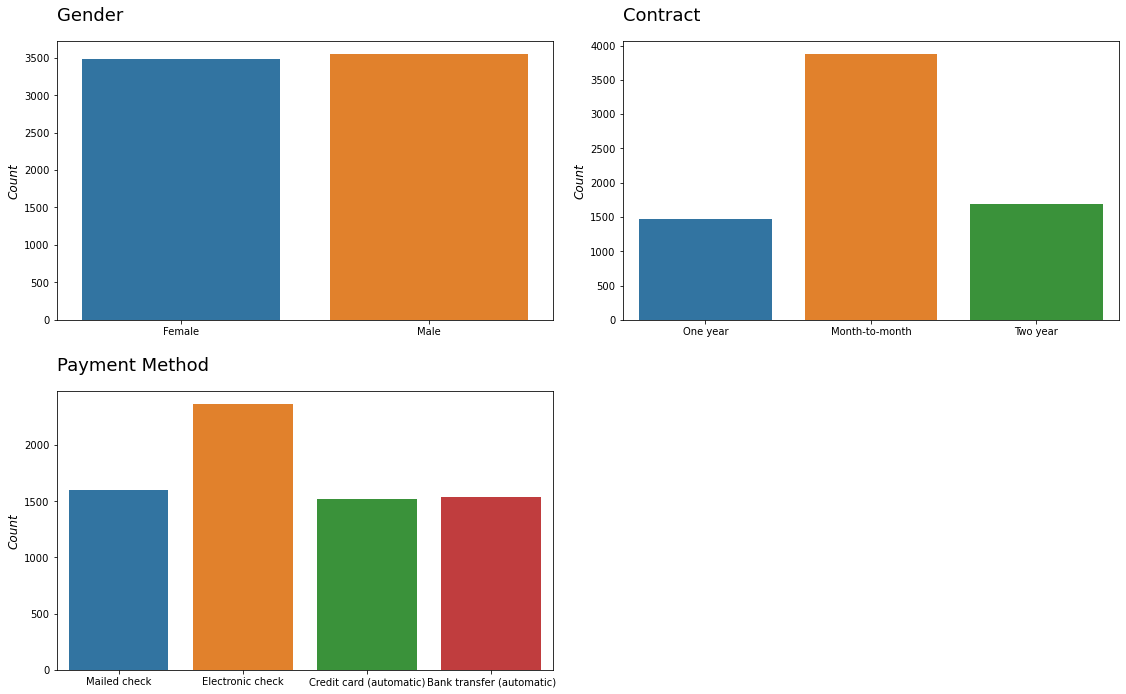

In [34]:
plt.figure(figsize=(16, 10), tight_layout={'pad':2.0})

# gender
plt.subplot( 2, 2, 1 )
ax1 = sns.countplot(x= cat_att['GENERO'] )
std_font(ax1, 'Gender',
         '', 'Count')

# contract
plt.subplot( 2, 2, 2 )
ax3 = sns.countplot( x=cat_att['CONTRATO'] )
std_font(ax3, 'Contract',
         '', 'Count')

# payment_method
plt.subplot( 2, 2, 3 )
ax5 = sns.countplot( x=cat_att['FORMA_PAGAMENTO'] )
std_font(ax5, 'Payment Method',
         '', 'Count')

#### 2.4 Bivariate Analysis

##### 2.4.1 Quanto mais tempo de contrato o cliente tiver, menor a taxa de churn.
VERDADEIRO - Percebemos, de acordo com o gráfico, que quanto maior o tempo de contrato observamos uma tendência de redução na taxa de churn. Além disso, observamos também que a maior taxa de churn estão entre os clientes de até 5 anos. Com esta informação, o time de negócio já consegue tomar ações para reter esses clientes.

In [6]:
import numpy as np

In [7]:
df.loc[df['MESES_CONTRATO'] == 0]


,ID,target,GENERO,IDOSO,CÔNJUGE,DEPENDENTES,MESES_CONTRATO,ASS_TEL,ASS_MULTI_TEL,ASS_INTERNET,ASS_AD_SEGURANÇA,BACKUP,PROTEÇÃO_DISPOSITIVO,SUP_TÉCNICO,TV_CABO,STREAMING,CONTRATO,FATURA_ONLINE,GASTO_DIARIO,FORMA_PAGAMENTO,GASTO_MENSAL,GASTO_TOTAL


In [48]:
fig = px.histogram(df, x='target')

fig.show()

In [49]:
def bota_titulo(titulo):

    fig.update_layout(
        title_text = titulo,
        title_xanchor = "center",
        title_x = 0.5,
        autosize=False,
        width=600,
        height=600,
    )

In [50]:
fig = px.histogram(df, x='target', color = 'target')

bota_titulo('Contagem de Churn')

fig.update_layout(legend_title = 'Churn')

fig.update_xaxes(title_text='Churn',
                 type = 'category')
fig.update_yaxes(title_text='Nº Clientes')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))

fig.show()

In [52]:
fig = px.pie(df, names='target')

bota_titulo('Percentual de Churn')

fig.update_layout(legend_title = 'Churn')

fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Churn", "Churn")))

fig.show()

Coluna Valor_Mensal

As colunas Valor_Mensal, Valor_Total e Valor_Dia possuem forte correlação entre si. Por conta disso, apenas a coluna Valor_Mensal foi escolhida para essa análise.

Para isso, será comparado a média do valor pago mensal, em conjunto com a evasão ou não do cliente.

In [60]:
grupo = df[['target', 'GASTO_MENSAL']].groupby('target').mean()
fig = px.bar(grupo, x=grupo.index, y='GASTO_MENSAL', color = grupo.index)

bota_titulo('Média de valor pago mensalmente')

fig.update_layout(legend_title = 'Churn')

fig.update_xaxes(title_text='Churn',
                 type = 'category')
fig.update_yaxes(title_text='Média de valor')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("GASTO_MENSAL", "Média mensal")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("target", "Evasão")))

fig.show()

Esse gráfico mostra que os clientes que evadiram gastaram mais, em média de valor mensal, quando comparados com os que não evadiram. Isso pode ser uma explicação para o motivo do cancelamento de contrato.

Coluna Tempo_Contrato
Essa é outra coluna numérica. Para isso, podemos comparar utilizando a média novamente.

In [59]:
grupo = df[['target', 'MESES_CONTRATO']].groupby('target').mean()
fig = px.bar(grupo, x=grupo.index, y='MESES_CONTRATO', color = grupo.index)

bota_titulo('Média de tempo de contrato de acordo com a Evasão')

fig.update_layout(legend_title = 'Churn')

fig.update_xaxes(title_text='Churn',
                 type = 'category')
fig.update_yaxes(title_text='Média de tempo de contrato')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("MESES_CONTRATO", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("target", "Evasão")))

fig.show()

In [64]:
temp = df.query('MESES_CONTRATO <= 10')
temp = temp.sort_values(by = 'MESES_CONTRATO', ascending = True)


fig = px.histogram(temp, x='MESES_CONTRATO', color = 'target', barmode = 'group')

bota_titulo('Dispersão entre os contratos até 10 meses')

fig.update_layout(legend_title = 'Churn')

fig.update_xaxes(title_text='Tempo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')


fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("MESES_CONTRATO", "Tempo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº clientes")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("target", "Churn")))


fig.show()

Percebe-se que entre clientes com 1 e 2 meses de contrato, a taxa de evasão é maior que a taxa de retenção. Clientes com 3, 4 ou 5 meses de contrato também possuem uma taxa alta de cancelamento, porém com mais clientes se mantendo na empresa.

Coluna Servico_Telefone

Os principais serviçoes prestados pela empresa são o de telefonia e o de acesso à internet. Além disso, essas colunas possuem informações extras. Primeiramente será analisada a coluna Servico_Telefone.

In [65]:
df.head(1)

,ID,target,GENERO,IDOSO,CÔNJUGE,DEPENDENTES,MESES_CONTRATO,ASS_TEL,ASS_MULTI_TEL,ASS_INTERNET,ASS_AD_SEGURANÇA,BACKUP,PROTEÇÃO_DISPOSITIVO,SUP_TÉCNICO,TV_CABO,STREAMING,CONTRATO,FATURA_ONLINE,GASTO_DIARIO,FORMA_PAGAMENTO,GASTO_MENSAL,GASTO_TOTAL
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.197407,Mailed check,65.6,593.3


In [68]:
fig = px.histogram(df, x='ASS_TEL', color = 'target',
                   barmode = 'group')

bota_titulo('Clientes com serviço de telefone')

fig.update_layout(legend_title = 'Churn')

fig.update_xaxes(title_text='Serviço de telefone',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("ASS_TEL", "Serviço de Telefone")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("target", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))

fig.show()

In [70]:
fig = px.histogram(df, x='ASS_TEL', color = 'target',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Taxa de evasão de clientes de acordo com o serviço de telefone')

fig.update_layout(legend_title = 'Churn')

fig.update_xaxes(title_text='Serviço de telefone',
                 type = 'category')
fig.update_yaxes(title_text='Percentual')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Servico_Telefone", "Serviço de Telefone")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Percentual")))

fig.show()

Com os gráficos analisados, não se percebe uma diferença de comportamento de evasão dependente apenas do Servico_Telefone+

Coluna Servico_Internet

Após a análise com clientes de telefonia, é possível continuar pros serviços de internet.

In [72]:
fig = px.histogram(df, x='ASS_INTERNET', color = 'target',
                   barmode = 'group')

bota_titulo('Serviço de internet do cliente')

fig.update_xaxes(title_text='Tipo de serviço de internet',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')



## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Servico_Internet", "Serviço de internet")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº clientes")))

fig.show()

Essa coluna apresenta um comportamento atípico: clientes que possuem internet de fibra óptica parecem ter um percentual maior de evasão. No lado oposto, clientes que não possuem internet, tem um percentual menor de evasão que o total dos clientes.

In [73]:
fig = px.histogram(df, x='ASS_INTERNET', color = 'target',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Taxa de evasão de clientes de acordo com o serviço de internet')

fig.update_xaxes(title_text='Tipo de serviço de internet',
                 type = 'category')
fig.update_yaxes(title_text='Percentual')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Servico_Internet", "Serviço de internet")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))

fig.show()

41.9% dos clientes que assinam Fibra Óptica cancelaram o plano. Isso deve ser analisado mais profundamente. As variáveis Tempo_Contrato e Valor_Mensal podem ter relação com esse comportamento.

Além disso, apenas 7.4% dos clientes que não assinam internet cancelaram o contrato. Isso também pode ser analisado com mais clareza

In [78]:
fig = px.histogram(df, x='CONTRATO', color = 'target',
                   barmode = 'group')

bota_titulo('Clientes de acordo com o tipo de contrato')

fig.update_xaxes(title_text='Tipo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Churn')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("CONTRATO", "Tipo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("target", "Churn")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))


fig.show()

Há uma aparente taxa de evasão maior com contratos do tipo mensal. Isso pode-se explicar pela pessoa não querer fazer um comprometimento de longo prazo. Quanto maior o contrato do cliente, menor a quantidade de clientes evadidos.

In [79]:
fig = px.histogram(df, x='CONTRATO', color = 'target',
                   barmode = 'group', barnorm = 'percent')

bota_titulo('Taxa de evasão de clientes de acordo com o tipo de contrato')

fig.update_xaxes(title_text='Tipo de contrato',
                 type = 'category')
fig.update_yaxes(title_text='Percentual')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Tipo_Contrato", "Tipo de contrato")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Percentual")))


fig.show()

Dos clientes com contrato mensal, 42% acabam cancelando o plano. Também há um padrão para os outros tipos de contrato, principalmente o Bianual, onde apenas 2.8% dos clientes cancela o plano.

In [80]:
fig = px.histogram(df, x='FATURA_ONLINE', color = 'target',
                   barmode = 'group')

bota_titulo('Clientes de acordo com o tipo de conta')


fig.update_xaxes(title_text='Conta digital',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Conta_Digital", "Conta digital")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))



fig.show()

Clientes que optam pela conta digital tem uma taxe de evasão maior que aqueles que recebem a conta em papel.

Coluna FORMA_PAGAMENTO

In [81]:
fig = px.histogram(df, x='FORMA_PAGAMENTO', color = 'target',
                   barmode = 'group')

bota_titulo('Clientes de acordo com o método de pagamento')

fig.update_xaxes(title_text='Conta digital',
                 type = 'category')
fig.update_yaxes(title_text='Contagem de clientes')

fig.update_layout(legend_title = 'Evasão')

## altera o label da contagem
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Metodo_Pagamento", "Método de pagamento")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("Evasao", "Evasão")))
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("count", "Nº Clientes")))


fig.show()

### pd.getdummies

In [ ]:
df = pd.get_dummies(df, columns=['CÔNJUGE'
                                'DEPENDENTES',
                                'ASS_TEL',
                                'ASS_MULTI_TEL',
                                'ASS_INTERNET',
                                'ASS_AD_SEGURANÇA',
                                'BACKUP',
                                'PROTEÇÃO_DISPOSITIVO',
                                'SUP_TÉCNICO','TV_CABO',
                                'STREAMING',
                                'CONTRATO',
                                'FATURA_ONLINE',
                                'FORMA_PAGAMENTO'
                                ], drop_first=True
                    )

In [ ]:
df.shape

In [ ]:
#df.drop(columns=['DEPENDENTES_No',
                'ASS_TEL_No',
                'ASS_MULTI_TEL_Yes',
                'ASS_AD_SEGURANÇA_Yes',
                'BACKUP_No',
                'PROTEÇÃO_DISPOSITIVO_Yes',
                'SUP_TÉCNICO_No',
                'TV_CABO_No',
                'STREAMING_Yes',
                'FATURA_ONLINE_No',
                'CÔNJUGE_No',
     #           ], inplace=True
   #     )

In [ ]:
df.shape

In [ ]:
# Traduzindo os nomes das colunas
df.rename(columns = {'GENERO_Female':'FEMININO',
           'GENERO_Male':'MASCULINO',
           'DEPENDENTES_Yes':'TEM_FILHOS', 
           'ASS_TEL_Yes':'ASS_TEL',
           'ASS_MULTI_TEL_No':'MULTI_ASS_TEL', 
           'ASS_INTERNET_DSL':'DSL_INTERNET', 
           'ASS_INTERNET_Fiber optic':'FIBRA_ÓPTICA', 
           'ASS_INTERNET_No':'SEM_INTERNET', 
           'ASS_AD_SEGURANÇA_No':'AD_SEGURANÇA',
           'BACKUP_Yes':'AD_BACKUP', 
           'PROTEÇÃO_DISPOSITIVO_No':'AD_PROTEÇÃO_DISPOSITIVO', 
           'SUP_TÉCNICO_Yes':'AD_SUP_TECNICO',
           'TV_CABO_Yes':'TV_CABO', 
           'STREAMING_No':'AD_STREAMING', 
           'CONTRATO_Month-to-month':'CONTRATRO_MENSAL',
           'CONTRATO_One year':'CONTRATO_ANUAL', 
           'CONTRATO_Two year':'CONTRATO_2_ANOS', 
           'FATURA_ONLINE_Yes':'FATURA_ONLINE',
           'FORMA_PAGAMENTO_Bank transfer (automatic)':'TRANSFERENCIA_BANCARIA', 
           'FORMA_PAGAMENTO_Credit card (automatic)':'CARTAO_CREDITO',
           'FORMA_PAGAMENTO_Electronic check':'BOLETO_ELETRONICO',
           'FORMA_PAGAMENTO_Mailed check':'BOLETO', 
           'CÔNJUGE_Yes':'PARCEIRO'
           } , inplace=True
)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.loc[:,'target'] = df['target'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df.columns

In [ ]:
teia = px.parallel_categories(df, dimensions=[
#'ID', 
'target', 
'GENERO', 
'IDOSO', 
#'MESES_CONTRATO', 
#'GASTO_DIARIO',
       #'GASTO_MENSAL', 
       #'GASTO_TOTAL', 
       'PARCEIRO', 
       'TEM_FILHOS', 
       #'ASS_TEL',
       #'MULTI_ASS_TEL', 
       #'DSL_INTERNET', 
       #'FIBRA_ÓPTICAS', 
       #'SEM_INTERNET',
       #'AD_SEGURANÇA', 
       #'AD_BACKUP', 
       #'AD_PROTEÇÃO_DISPOSITIVO',
       #'AD_SUP_TECNICO', 
       #'TV_CABO', 
       #'AD_STREAMING', 
       'CONTRATRO_MENSAL',
       'CONTRATO_ANUAL', 
       'CONTRATO_2_ANOS', 
       #'FATURA_ONLINE',
       #'TRANSFERENCIA_BANCARIA', 
       #'CARTAO_CREDITO', 
       #'BOLETO_ELETRONICO',
       #'BOLETO'
       ]                                             
)

teia.show()

In [ ]:
teia = px.parallel_categories(df, dimensions=[
#'ID', 
'target', 
#'GENERO', 
#'IDOSO', 
#'MESES_CONTRATO', 
#'GASTO_DIARIO',
#'GASTO_MENSAL', 
#'GASTO_TOTAL', 
#'PARCEIRO', 
#'TEM_FILHOS', 
#'ASS_TEL',
#'MULTI_ASS_TEL', 
#'DSL_INTERNET', 
#'FIBRA_ÓPTICAS', 
#'SEM_INTERNET',
#'AD_SEGURANÇA', 
#'AD_BACKUP', 
#'AD_PROTEÇÃO_DISPOSITIVO',
#'AD_SUP_TECNICO', 
#'TV_CABO', 
#'AD_STREAMING', 
'CONTRATRO_MENSAL',
'CONTRATO_ANUAL', 
'CONTRATO_2_ANOS', 
'FATURA_ONLINE',
'TRANSFERENCIA_BANCARIA', 
'CARTAO_CREDITO', 
'BOLETO_ELETRONICO',
'BOLETO'
       ]                                             
)

teia.show()

In [ ]:
teia = px.parallel_categories(df, dimensions=[
#'ID', 
'target', 
#'GENERO', 
#'IDOSO', 
#'MESES_CONTRATO', 
#'GASTO_DIARIO',
#'GASTO_MENSAL', 
#'GASTO_TOTAL', 
#'PARCEIRO', 
#'TEM_FILHOS', 
'ASS_TEL',
'MULTI_ASS_TEL', 
'DSL_INTERNET', 
'FIBRA_ÓPTICAS', 
'SEM_INTERNET',
'AD_SEGURANÇA', 
'AD_BACKUP', 
'AD_PROTEÇÃO_DISPOSITIVO',
'AD_SUP_TECNICO', 
'TV_CABO', 
'AD_STREAMING', 
#'CONTRATRO_MENSAL',
#'CONTRATO_ANUAL', 
#'CONTRATO_2_ANOS', 
#'FATURA_ONLINE',
#'TRANSFERENCIA_BANCARIA', 
#'CARTAO_CREDITO', 
#'BOLETO_ELETRONICO',
#'BOLETO'
       ]                                             
)

teia.show()

In [ ]:
df.to_csv('df_dummie.csv')